#  <center>Case Study</center>

# <span style="color: brown">1) Problematization:<span>


The challenge at the heart of the use case is to improve the overall education level by constructing a prioritization tool for academical advisors. The tool is supposed to account for two main factors. First, the **value** of the counseling for the students. Second, the complexity/difficulty of conducting the counseling for the student.

Before suggesting our appraoch, there is a number of issues that seem to be important to address in order to properly model and resolve the problem at hand.
One issue would be to understand and question the notions of **value** and **complexity** of the counseling program. Ethically, one could argue that inherent complexity of a student's social and school situation should be the only factor for students prioritization. For example, a sudent with an average grade (>12) could have a difficult social condition and the counseling program could tend to ignore such a profil. A more apparent and generic problem would be caused by the presence of the student's `level` as a confusion factor. This kind of students might be ignored by a more value oriented program. Another apparent fact is that the decision making tool might need to inlude all students with low grades. Therefore, this kind of ethical questions need to be addressed with the final users.

# <span style="color: brown">2) Our appraoch:<span>
The basis of our suggestion approach is to think in the point of view of the final user (advisor/academic counseler). The user has a set of strategies to improve a student's performance. One way of seeing those strategies is throughout the presented features of our dataset (`study time, absences, alcohol consumption, extra hours, ...etc.`). The user can define objective performances on each of those actionable features for a student in order to improve his performance.
    
Having this point of view of the problem, our approach will be to create a tool that helps the advisor estimate the value of a strategy and its complexity.
Fo that we will: 
    
- First develop a `machine learning model` that characterizes a student's score given the provided dataset features (`grading model`).
- Use a set of default actionable features for our first version of the product. Setting those features to their apparent optimal value and having the grading model, we can have an estimation of the expected score for each student given the strategy.
    
Our main **value** feature in this approach will be the performance gain (`PerformanceGain`) for each student given the strategy, which is the difference between the predicted gain for each student when applying the strategy and the actual score. As for the complexity, we will use a simple heuristic for this version of the product, that accounts for the total range of modifications for each student given a counseling strategy. For example, using our default retained counseling strategy settings (see the section `Advisor strategy settings` in the side bar), for a student with (studytime=1, absences=12, Dalc=3, Walc=4, freetime=1, schoolsup=1, famsup=no) the **complexity** would be `(4-1)[for studytime]+(12-0)[for absences]+(3-1)[for Dalc]+(4-1)[for Walc]+(5-1)[for freetime]+(1-1)[for schoolsup]+(1-0)[for famsup] = 25`. This measure is representative of the difficulty of helping students and thus of the **complexity** of counseling.

# <span style="color: blue">Descriptive analysis:<span>

In [8]:
# Filter out warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
# import data processing libraries
import pandas as pd
import numpy as np
# import DataViz tools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# set theme
mpl.rc_file_defaults()
plt.style.use('seaborn-whitegrid')
sns.set_palette(sns.color_palette("bright", 25))
from IPython.display import display

In [10]:
# pandas options
pd.set_option('display.max_columns', None)
# load data
df_data = pd.read_csv("student_data.csv", index_col="StudentID", sep=None).drop(["FirstName", "FamilyName"], axis=1)
display(df_data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
StudentID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10


In [4]:
display(df_data.describe(include="all"))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357,357,357.000000,357,357,357,357.000000,357.000000,357,357,357,357,357.000000,357.000000,357.000000,357,357,357,357,357,357,357,357,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,315,185,NaN,279,250,318,NaN,NaN,127,196,126,248,NaN,NaN,NaN,307,219,184,180,286,343,299,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.655462,NaN,NaN,NaN,2.795518,2.546218,NaN,NaN,NaN,NaN,1.431373,2.042017,0.271709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,NaN,NaN,1.268262,NaN,NaN,NaN,1.093999,1.084217,NaN,NaN,NaN,NaN,0.686075,0.831895,0.671750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000


- ### Study features fffect on the target final score:

In [11]:
# data visualisation utils

def plot_discrete_distribution(x, y=None, from_count=False, show_percent=True,
                               figsize=(15,6), ax_params=None, title=None):
    try:
        assert y is None and from_count==True or y is not None and from_count==False
        if from_count:
            barplot_data = x.value_counts()
            x, y = barplot_data, barplot_data.index
        fmt_percent = lambda x: f"{round(x, 3)}%"
        if ax_params is None:
            ax_params = {"orient": "h"}
        _, ax = plt.subplots(1, 1, figsize=figsize)
        sns.barplot(x=x, y=y, ax=ax, **ax_params)
        ax.set_title(label=x.name if title is None else title)
        if show_percent:
            labels = list(map(fmt_percent, 100*ax.containers[0].datavalues/ax.containers[0].datavalues.sum()))
        else:
            labels = ax.containers[0].datavalues
        ax.bar_label(ax.containers[0], labels=labels)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
    except AssertionError:
        return "Wrong parameters supplied"
    
def plot_discrete_distribution_on_groupby(df, by, quantity, figsize=(8,4)):
    nbr_trans_per_earning = df[[by, quantity]].groupby(by=by).median().sort_values(by=quantity)[quantity]
    plot_discrete_distribution(y=nbr_trans_per_earning.index, x=nbr_trans_per_earning, from_count=False, show_percent=False,
                           figsize=figsize, ax_params=None, title=f"Median {quantity}")

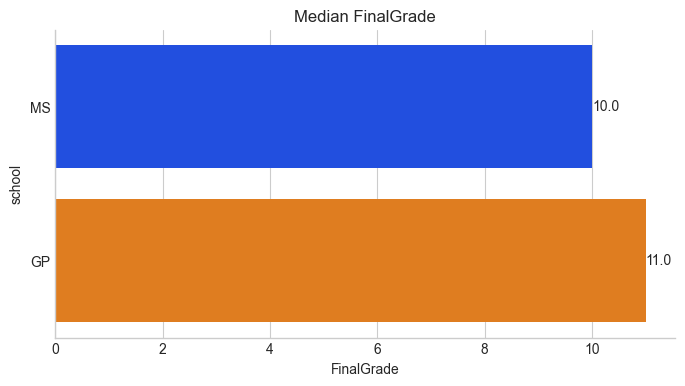

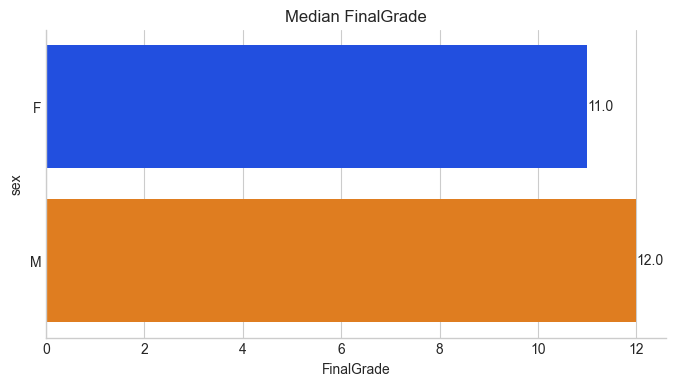

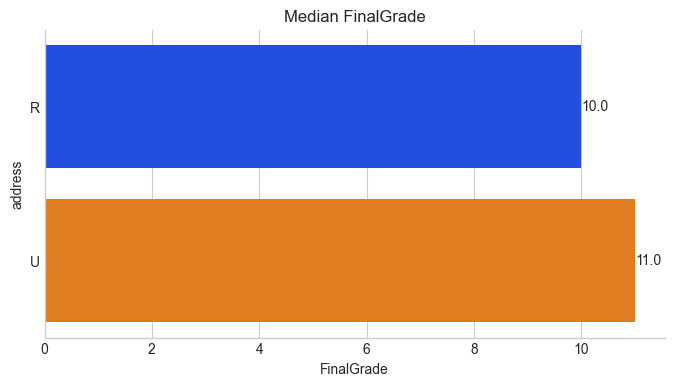

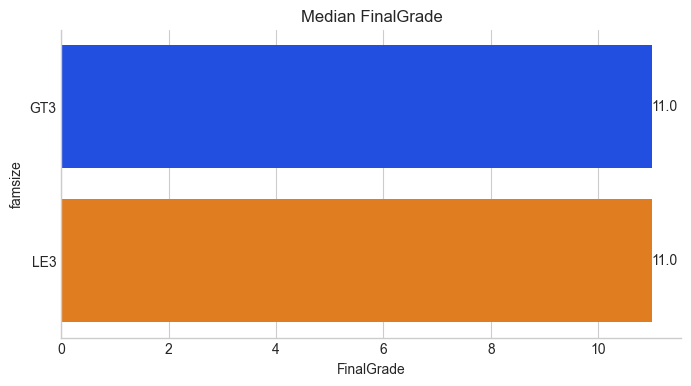

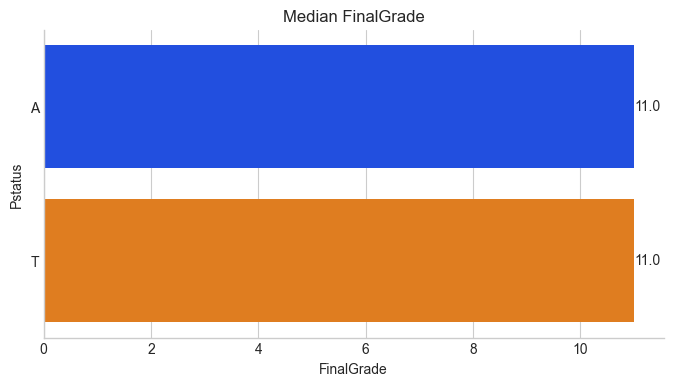

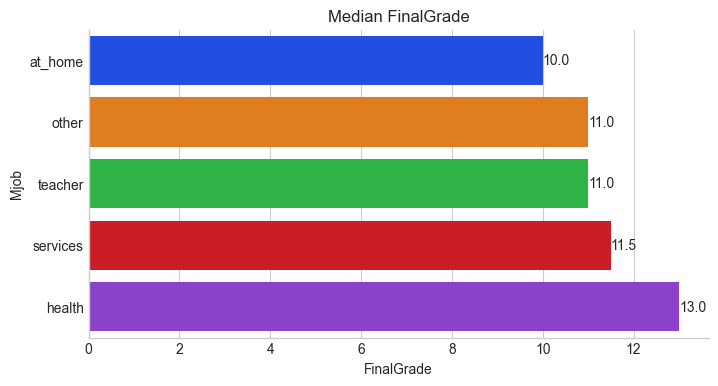

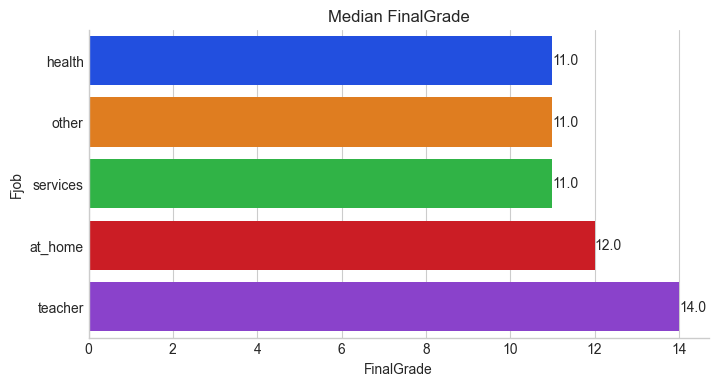

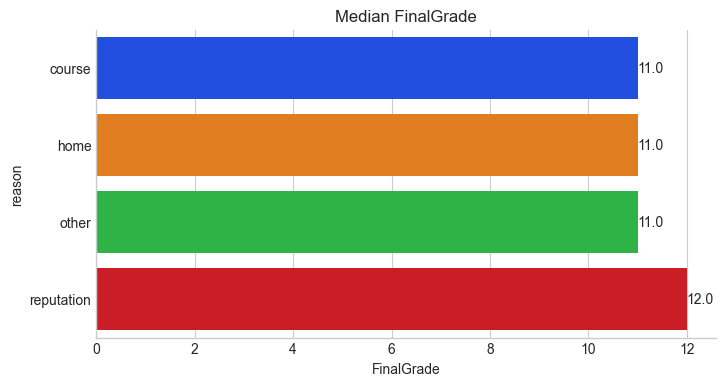

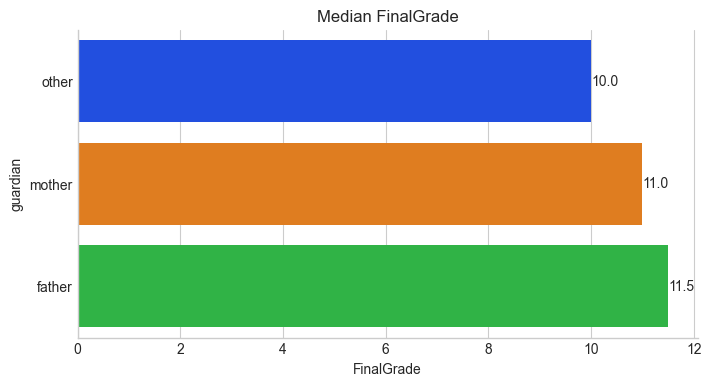

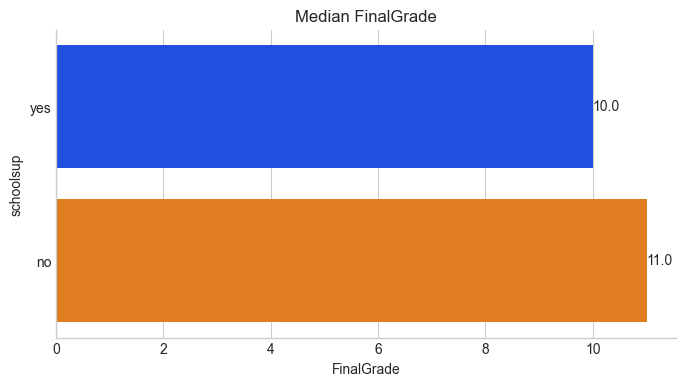

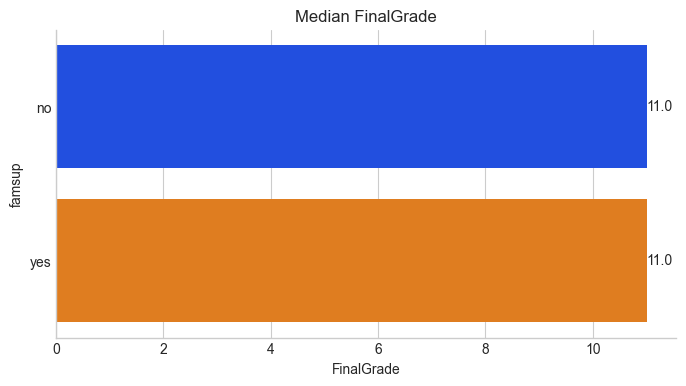

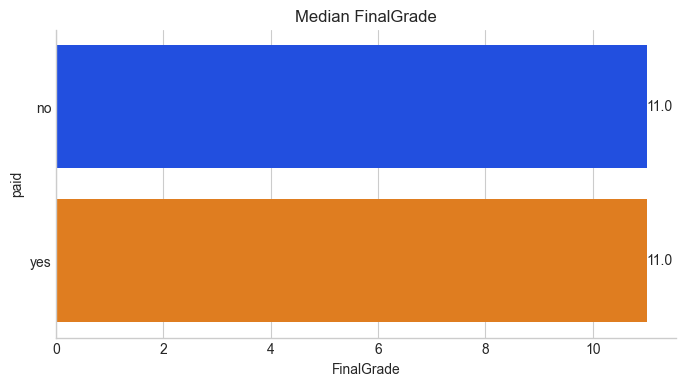

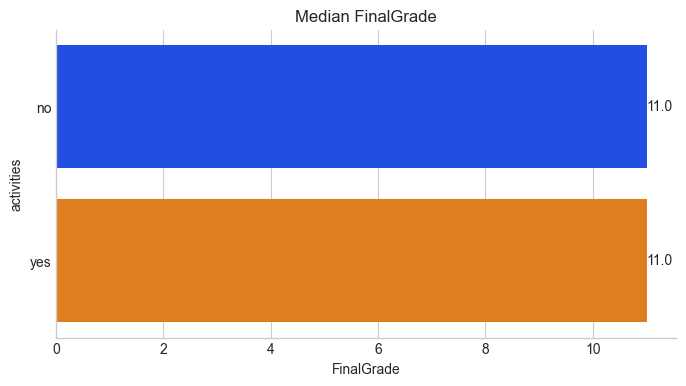

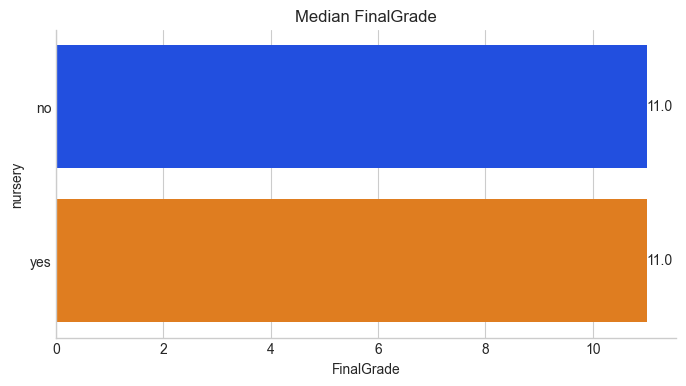

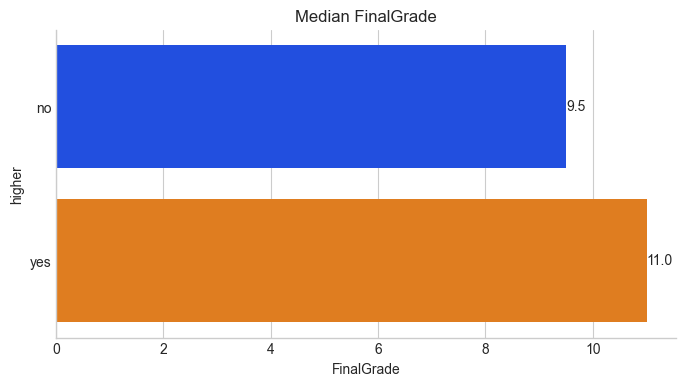

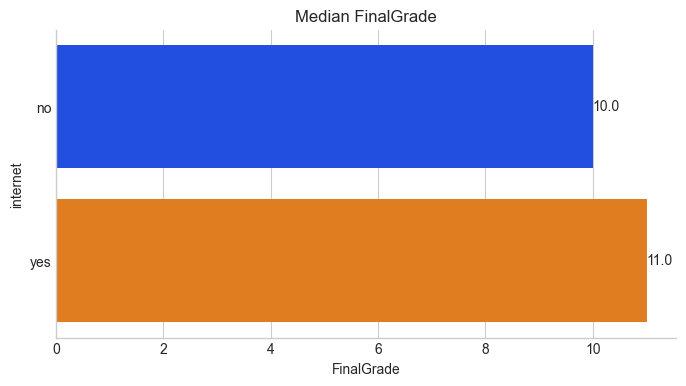

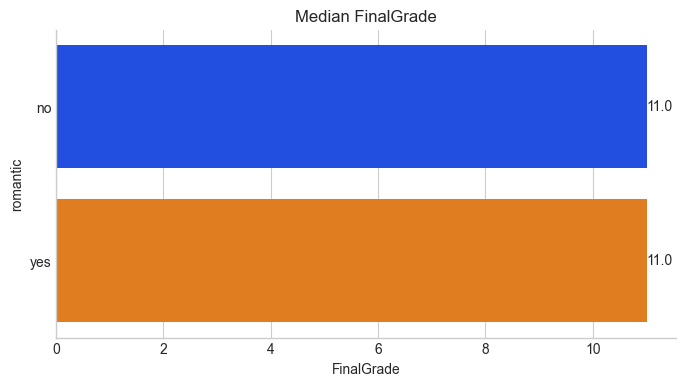

In [12]:
# categorical variables effects
cat_vars = ("school", "sex", "address", "famsize", "Pstatus", 
            "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", 
            "paid", "activities", "nursery","higher", "internet", "romantic")
    
for gp_var in cat_vars:
    plot_discrete_distribution_on_groupby(df_data, gp_var, "FinalGrade")

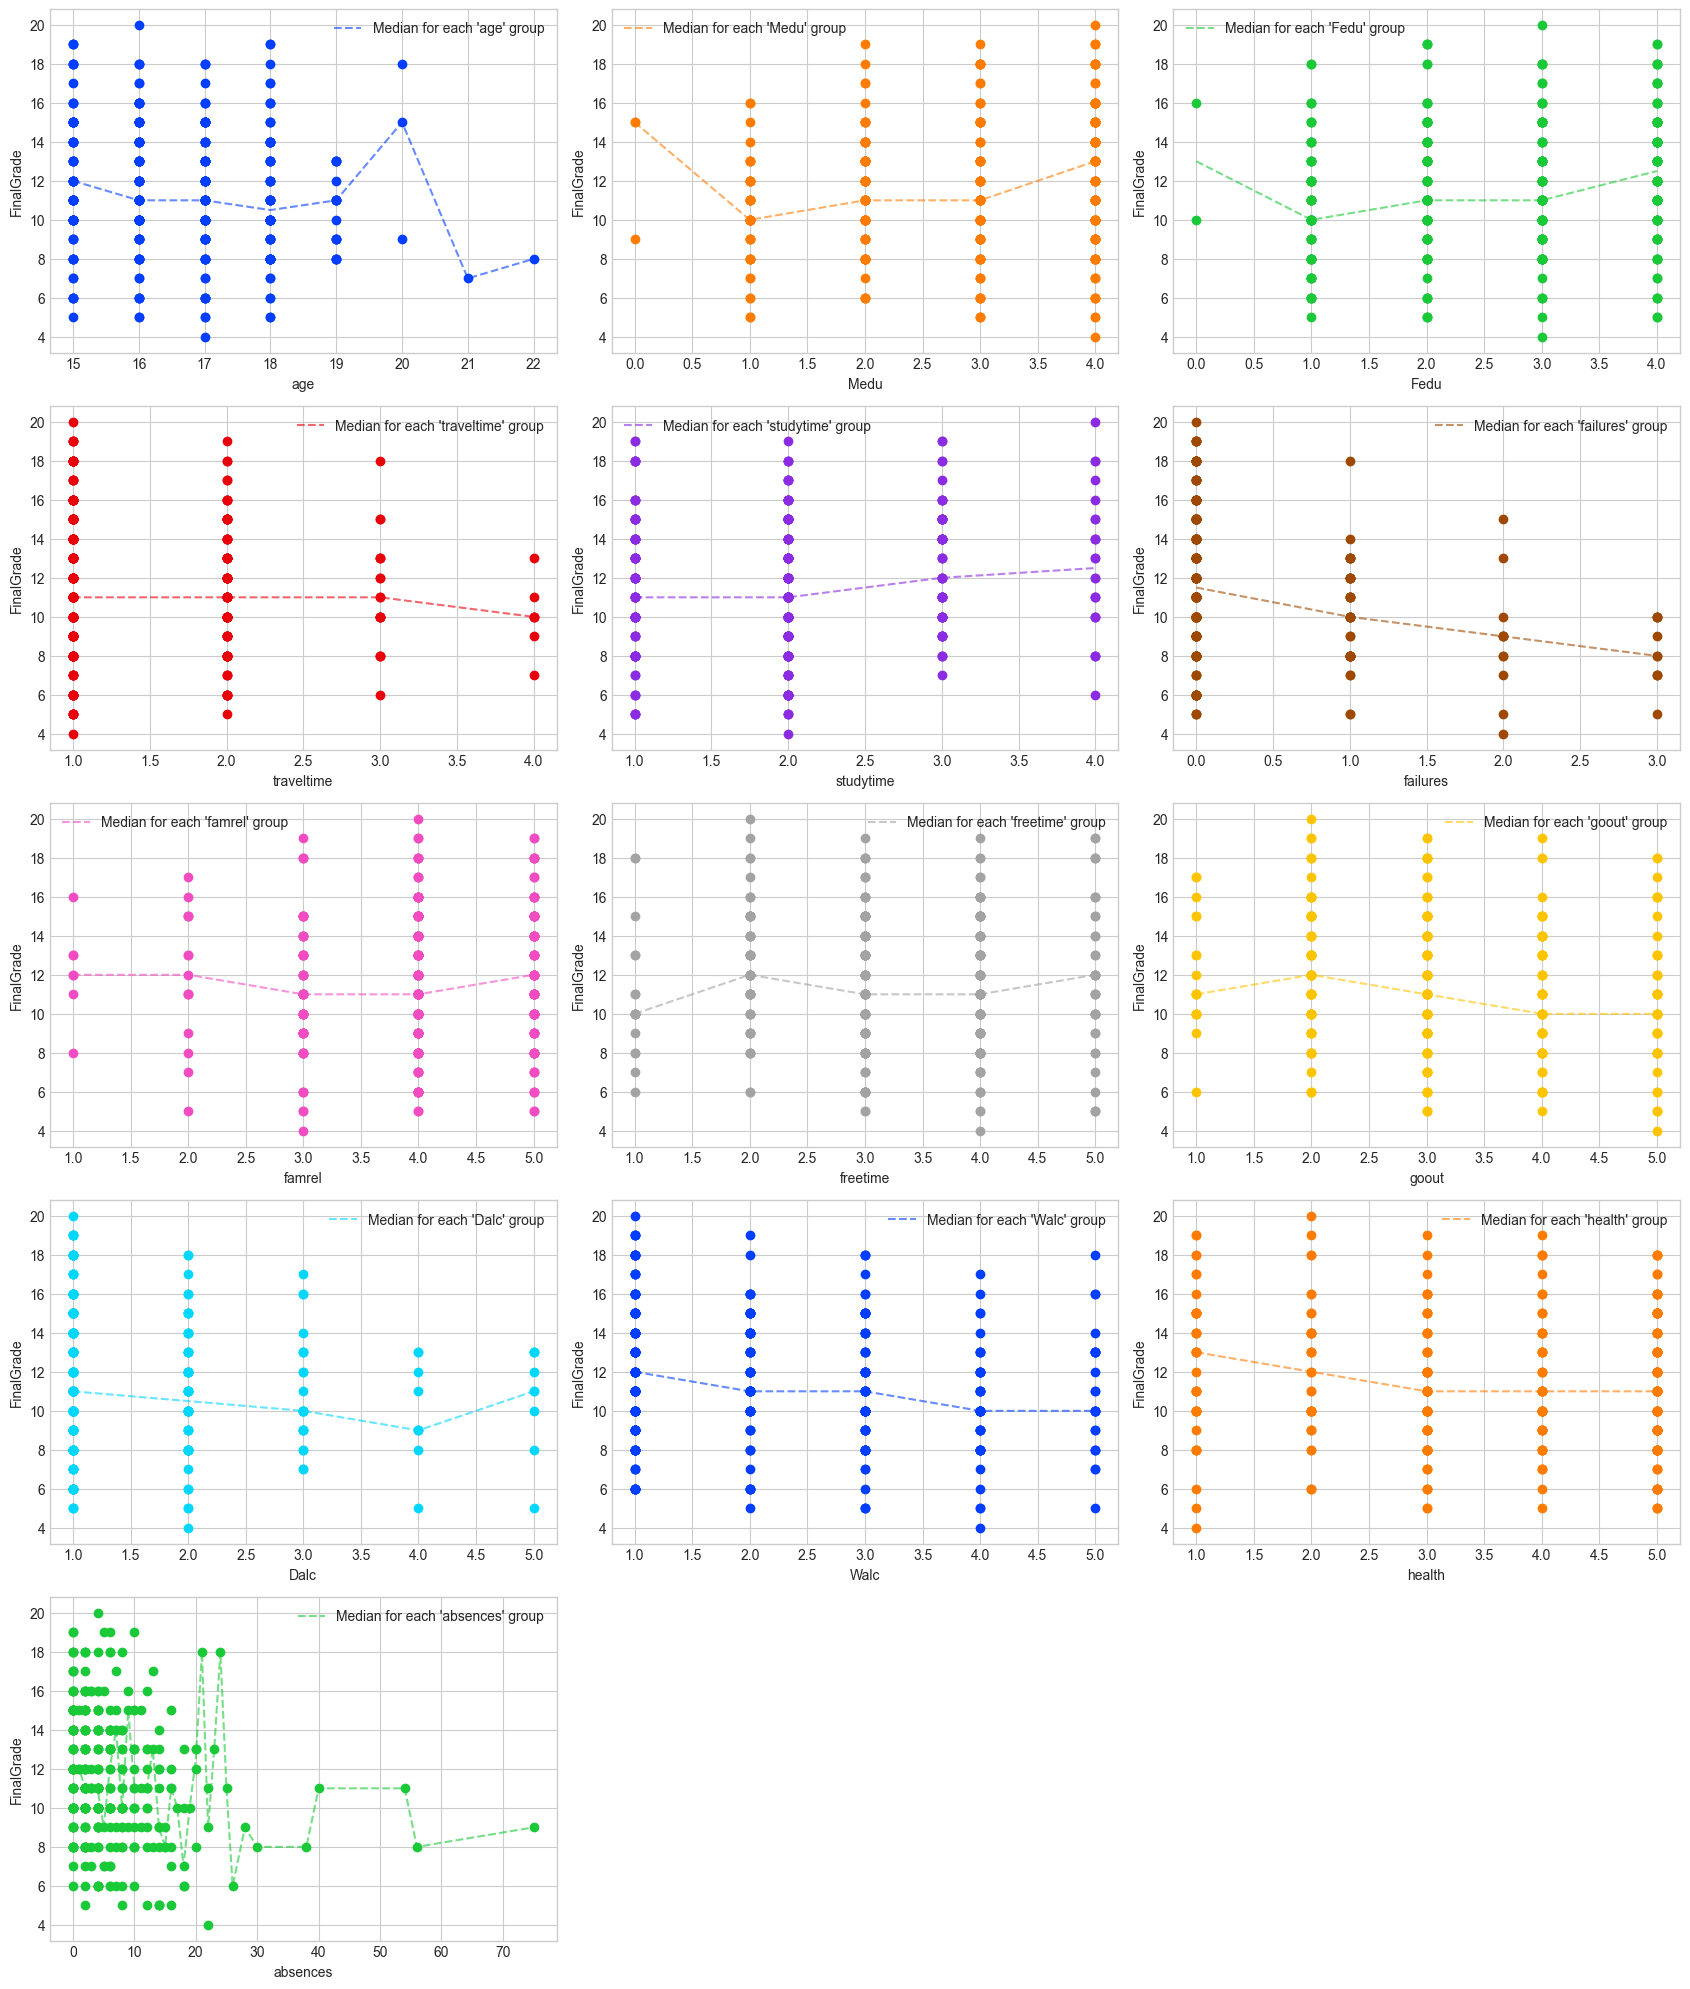

In [13]:
palette = sns.color_palette("bright", 20)
numeric_variables = ["age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", 
                     "freetime", "goout", "Dalc", "Walc", "health", "absences"]

fig, axes = plt.subplots(5, 3, figsize=(17,20))
axes = axes.flatten()
for i, variable in enumerate(numeric_variables):
    variable_agg_data = df_data[[variable, "FinalGrade"]].groupby(variable).agg({'FinalGrade' : ["median", "mean"]})
    median_agg_data = variable_agg_data[("FinalGrade", "median")]
    axes[i].plot(median_agg_data.index, median_agg_data, color=palette[i], linestyle="--", alpha=0.6, label=f"Median for each '{variable}' group")
    axes[i].scatter(df_data[variable], df_data.FinalGrade, color=palette[i])
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel("FinalGrade")
    axes[i].legend(loc="best")
while i < len(axes)-1:
    axes[i+1].axis("off")
    i+=1
    
fig.tight_layout()
plt.show()

#### <span style="color:blue">Partial conclusion: </span>:
We notice that some features present a tendency towards our target feature (FinalScore): `study_time`, `absences`, `Dalc`, `Walc`...
A further analysis could be done to statistically validate the relashship between the target and each feature (Association frequentist tests comparing the proportions for categorical variables and mean comparison ones could be used to assess that (`chi2 test` (or `fisher test`) for categorical variables and a mean comparison `t-test` for categorical variables)).

# <span style="color: blue">Student Grading Model:<span>
    
We need to construct a regression model adapted for our small dataset, that explains the score as good as possible given the provided features. For this first version of the model, we will not proceed with any feature engineering, instead we will keep all the given features as they are.
    
Our dataset size is (357, 31) with 18 categorical variables. To keep the model easy to explain and less prone to overfitting we will be training our score with these models:
- `Linear regression`: Not a complex model, easy to explain but prone to underfitting.
- `Lasso`, `Ridge` & `ElasticNet`: Regularized linear regression models to potentially improve the model's generalisability.
- `Random Forests`: Tree based model used instead of a basic decision tree to avoid overfitting and make sure more features are used during the information gain computation, in order to imporve generalisability and reduce overfitting.
    
- For data preprocessing, we will encode categorical variables using `one hot encoding`. We will not proceed with standardizing the features for the linear models (not needed for tree based models) in order to keep the models coefficient explainable of each feature's scale and also because the most of numerical variables are discrete scores with low number of values (So standarization makes less sens given `the Law Of Large Numbers`). In adition to that, there is no numrical variable with a very low/high scale that could affect the interpretability of the regression parameters.
    
- For model validation, given the low number of obervation we will only test on 33% of the data and train on the rest (No cross validation is conducted for our baseline model).
    
- To assess the perfromance of our model, we will concentrate on the mean squared error (More metrics could be explored for later versions).
    
- Parameters tuning: To focus more on the final product, we did not proceed with any grid search. This, can surely be done to better tune the parameters of each model and particularly of the retained one.

In [22]:
def onehot_encoder(X, cat_vars):
    cat_encoder_params = {"handle_unknown":"error", "drop":'first'}
    ohe = OneHotEncoder(**cat_encoder_params) 
    ohe.fit(X[cat_vars])
    X[ohe.get_feature_names()] = ohe.transform(X[cat_vars]).toarray()
    return X.drop(cat_vars, axis=1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split

X, y = df_data.drop(["FinalGrade"], axis=1), df_data["FinalGrade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

cat_vars = ["school","sex", "address", "famsize", "Pstatus", 
            "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", 
            "paid", "activities", "nursery","higher", "internet", "romantic"]

cat_encoder_params = {"handle_unknown":"ignore", "drop":'first'}
def preprocess(X, ohe=None, return_ohe=False):
    x = X.copy()
    if ohe is None:
        ohe = OneHotEncoder(**cat_encoder_params) 
        ohe.fit(x[cat_vars])
    x[ohe.get_feature_names_out()] = ohe.transform(x[cat_vars]).toarray()
    x.drop(cat_vars, axis=1, inplace=True)
    if return_ohe:
        return x, ohe
    return x

def train_estimator(regressor, train_x, train_y, return_ohe=False):
    train_x, ohe = preprocess(train_x, return_ohe=return_ohe)
    regressor.fit(train_x, train_y)
    return regressor, ohe

In [31]:
# training
rf_reg, ohe = train_estimator(RandomForestRegressor(n_estimators=100), X_train, y_train, return_ohe=True)
lr_reg, _ = train_estimator(LinearRegression(), X_train, y_train, return_ohe=True)
lrLasso_reg, _ = train_estimator(Lasso(), X_train, y_train, return_ohe=True)
lrRidge_reg, _ = train_estimator(Ridge(), X_train, y_train, return_ohe=True)
lren_reg, _ = train_estimator(ElasticNet(), X_train, y_train, return_ohe=True)

In [32]:
from sklearn.metrics import mean_squared_error, explained_variance_score

def printout_metrics(regressor, X_train, y_train, X_test, y_test, metric=mean_squared_error, ohe=None):
    print("Estimator:", regressor)
    print(f"Training MSE: {metric(y_train, regressor.predict(preprocess(X_train, ohe=ohe)))}")
    print(f"Test MSE: {metric(y_test, regressor.predict(preprocess(X_test, ohe=ohe)))}")
    print("-"*100)
    
printout_metrics(rf_reg, X_train, y_train, X_test, y_test, ohe=ohe)
printout_metrics(lr_reg, X_train, y_train, X_test, y_test, ohe=ohe)
printout_metrics(lrLasso_reg, X_train, y_train, X_test, y_test, ohe=ohe)
printout_metrics(lrRidge_reg, X_train, y_train, X_test, y_test, ohe=ohe)
printout_metrics(lren_reg, X_train, y_train, X_test, y_test, ohe=ohe)

Estimator: RandomForestRegressor()
Training MSE: 1.3212389121338912
Test MSE: 8.862388135593218
----------------------------------------------------------------------------------------------------
Estimator: LinearRegression()
Training MSE: 6.689827375040842
Test MSE: 8.938236419470305
----------------------------------------------------------------------------------------------------
Estimator: Lasso()
Training MSE: 10.074249359130803
Test MSE: 9.743529812539752
----------------------------------------------------------------------------------------------------
Estimator: Ridge()
Training MSE: 6.697969479690939
Test MSE: 8.670756066933693
----------------------------------------------------------------------------------------------------
Estimator: ElasticNet()
Training MSE: 9.775040908185744
Test MSE: 9.43981939478576
----------------------------------------------------------------------------------------------------


In [33]:
dict(zip(rf_reg.feature_names_in_, lrRidge_reg.coef_))

{'age': -0.3317401160810365,
 'Medu': 0.06786151784446594,
 'Fedu': 0.21717205313739205,
 'traveltime': -0.17142671612658633,
 'studytime': 0.5067457506570604,
 'failures': -0.8993134754708992,
 'famrel': 0.17721212542248593,
 'freetime': -0.008553907146037312,
 'goout': -0.34918465803413523,
 'Dalc': 0.222610085126808,
 'Walc': -0.1911903113044277,
 'health': -0.3018606009681253,
 'absences': -0.06688432383674998,
 'school_MS': 0.04665787430773873,
 'sex_M': -0.0627087016734985,
 'address_U': -0.04614938331877113,
 'famsize_LE3': 0.40445167287281614,
 'Pstatus_T': -0.9597452951507551,
 'Mjob_health': 1.9189898301168908,
 'Mjob_other': -0.01046463404126751,
 'Mjob_services': 1.3768534773340981,
 'Mjob_teacher': -0.6941642265030514,
 'Fjob_health': -1.07619388585389,
 'Fjob_other': -0.41882548286287696,
 'Fjob_services': -0.41378858582495753,
 'Fjob_teacher': 1.315847487517579,
 'reason_home': 0.6905525198826465,
 'reason_other': -0.6900512591882335,
 'reason_reputation': -0.29314405806

#### <span style="color:blue">Partial conclusion: </span>:
The model with the lowest test error is Ridge model (Linear regression with norm 2 regularization). This could be investigated more to improve the performance and validate the appropriate model in future versions.

Thi being said, we can already notice some expected tendencies:
- `absences` influnecing negatively the final score.
- `Study time` positively influnecing the final score.
...etc.

We retrain this model on the whole dataset and store it below for inference in our dashboard application (the one hot encoder will also be stored for faster data tranformation during inference time).

In [37]:
lrRidge_reg, ohe = train_estimator(Ridge(), X, y, return_ohe=True)

In [38]:
# save the model
from joblib import dump, load
dump(ohe, 'grader-encoder-v1.joblib') 
dump(lrRidge_reg, 'grader-model-v1.joblib') 

['grader-model-v1.joblib']

# <span style="color: blue">Default Strategy:<span>
Not having the advisors input on all the actionable features in this version, we suggest some of the features that are inherently improvable, while we keep the other actionable features out for future versions.
    
The features we suggest are objectively actionable compared to other features that advisors can not logically approach (An example would be:  `Quality of family relashionships`).
    
Thus our retained actionable features for this version are: `['studytime', 'absences', 'Dalc', 'Walc', 'freetime', 'schoolsup', 'famsup', 'paid']`.
    
Our default strategy will suggest imporvements of students performance upon imporving those features. The default setting for each feature will be the most optimistic value, that puts students in the best condition to improve their performance `[('studytime', 4), ('absences', 0), ('Dalc', 1), ('Walc', 1), ('freetime', 5), ('schoolsup', 'yes'), ('famsup', 'yes'), ('paid', 'yes')]`.

# <span style="color: blue">Futur Work:<span>

The modelling part of the analysis is not optimal and a lot of work can be done for model and parameter tunning. Also, we can calculate feature importances for the model and construct better complexity measures that account for that. 

We also notice that the grading model tends to predict negative peformance gain, which is supposedly an unexpected behavior, given that the actionable insights are inherently positive for students. This is clearly a flaw in the model. Some appoaches to address that are:
    
- Gather more modelling data because the model is not capturing the true patterns describing the final score.
- Tune models parameters.
- Gather new features about the students (student level related ones to avoid it being a confusion factor and account for it during modelling)
...etc.